# PCA for our data

In [19]:
# !pip install plotly

In [20]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import collections
import plotly.express as px
from sklearn.manifold import TSNE


FILENAME_0 = "original_tpm_data.csv"
FILENAME_1 = "pca_data_100.csv"
FILENAME_2 = "pca_data_080.csv"

In [21]:
#Daten einlesen
df = pd.read_csv(
    filepath_or_buffer = FILENAME_0,
    sep=",",
)

df.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC092910.4,AC073611.1,AC136977.1,AC078856.1,AC008763.4,AL592295.6,AC006486.3,AL391628.1,AP006621.6,cancer_type
0,8.2367,0.0000,25.8092,0.9317,0.2657,2.9539,1.4042,15.7151,4.5194,4.9240,...,0.0000,0.1066,0.0,0.0,0.0,3.6421,0.0,0.0035,0.7835,kidney chromophobe
1,4.0204,0.1582,16.6135,0.5691,0.1217,1.4957,0.1268,10.0106,3.0583,2.1101,...,0.0000,0.2003,0.0,0.0,0.0,2.4549,0.0,0.0944,0.4324,kidney chromophobe
2,30.3101,0.0000,194.5276,4.1172,4.2266,9.3357,11.7886,63.2781,8.2357,61.3211,...,0.0000,0.5563,0.0,0.0,0.0,10.8131,0.0,0.0336,1.5405,kidney chromophobe
3,192.6733,2.2687,166.1158,13.8005,2.6671,9.7596,9.5741,62.3076,7.1604,30.2865,...,0.0000,0.1799,0.0,0.0,0.0,11.7993,0.0,0.2841,0.5695,kidney chromophobe
4,29.3118,0.2938,56.6818,1.8314,0.4773,0.5403,0.5084,25.3080,5.7213,5.0955,...,0.5162,0.1739,0.0,0.0,0.0,6.1702,0.0,0.0129,0.1659,kidney chromophobe


In [22]:
# In Frautres und Klasse aufteilen

features = df.iloc[:, 0:-1].values
Class = df.iloc[:, -1].values


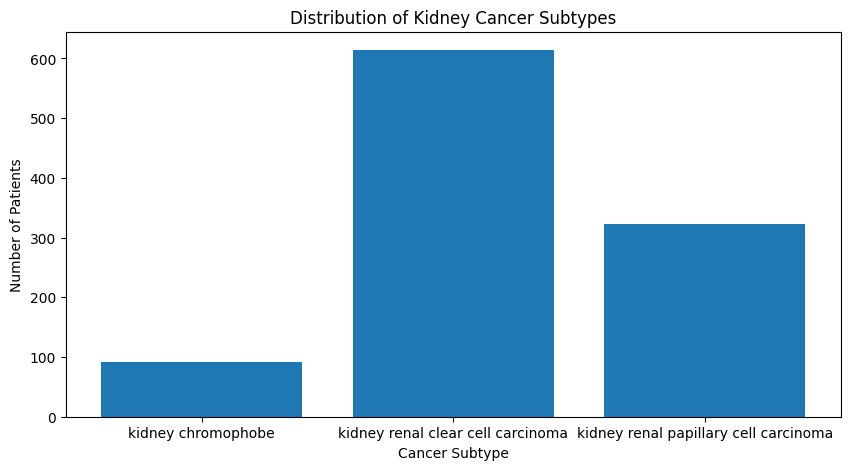

In [23]:
# Daten visualisieren, wie viele mit welchem ubtyp es gibt

counter = collections.Counter(Class)
fig = plt.figure(figsize=(10, 5))
plt.bar(counter.keys(), counter.values())
plt.xlabel("Cancer Subtype")
plt.ylabel("Number of Patients")
plt.title("Distribution of Kidney Cancer Subtypes")
plt.show()

In [24]:
# Daten standardisieren
features_std = StandardScaler().fit_transform(X=features)

In [25]:
"""
# Anwenden der PCA: ~100% explained variance 
pca = PCA(n_components=1028)

principalComponents = pca.fit_transform(features_std)
pca.explained_variance_ratio_
print(pca.explained_variance_ratio_.sum())
principalDataframe = pd.DataFrame(data = principalComponents)
"""

'\n# Anwenden der PCA: ~100% explained variance \npca = PCA(n_components=1028)\n\nprincipalComponents = pca.fit_transform(features_std)\npca.explained_variance_ratio_\nprint(pca.explained_variance_ratio_.sum())\nprincipalDataframe = pd.DataFrame(data = principalComponents)\n'

In [26]:
"""
# Klassenlabel wieder hinzufügen

targetDataframe = df[['cancer_type']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

#export data in csv
newDataframe.to_csv(FILENAME_1, sep=",", index=False)
"""

'\n# Klassenlabel wieder hinzufügen\n\ntargetDataframe = df[[\'cancer_type\']]\nnewDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)\n\n#export data in csv\nnewDataframe.to_csv(FILENAME_1, sep=",", index=False)\n'

In [27]:
# Anwenden der PCA: ~80% explained variance
pca2 = PCA(n_components=200)

principalComponents2 = pca2.fit_transform(features_std)
pca2.explained_variance_ratio_
print(pca2.explained_variance_ratio_.sum())
principalDataframe2 = pd.DataFrame(data = principalComponents2)

0.8129943257619805


In [28]:
# Klassenlabel wieder hinzufügen

targetDataframe = df[['cancer_type']]
newDataframe = pd.concat([principalDataframe2, targetDataframe],axis = 1)

#export data in csv
newDataframe.to_csv(FILENAME_2, sep=",", index=False)

In [29]:
# Visualisierung

# fig = px.scatter(principalComponents,x = 0, y=1, color=df['cancer_type'])
fig = px.scatter(principalComponents2,x = 0, y=1, color=df['cancer_type'])
fig.show()


## Datenvisualisierung mit t-SNE-Plot


In [30]:
#wie im Paper von Marquardt et al.
tsne = TSNE(n_components=2,init='random', perplexity=27, n_iter=10000, learning_rate=300, random_state = 0)
tsne_results = tsne.fit_transform(principalComponents2)

In [31]:
fig = px.scatter(tsne_results,x=0,y=1, color=df['cancer_type'])
fig.show()